In [ ]:
ハイパーパラメータ
人の手でチューニングする必要のあるパラメータ
モデルの構築時などに設定

In [ ]:
# 架空のモデルClassifierを例にしたチューニング方法
model = Classifier(param1=1.0, param2=True, param3="linear")


In [ ]:
(例)　ロジスティック回帰

ロジスティック回帰にはCというパラメーターが存在します。 このCはモデルが学習する識別境界線が教師データの分類間違いに対してどのくらい厳しくするのかという指標になります。

Cの値が大きいほどモデルは教師データを完全に分類できるような識別線を学習するようになります。 
しかし教師データに対して過剰なほどの学習を行うために過学習に陥り、訓練データ以外のデータに予測を行うと正解率が下がる場合が多くなります。

Cの値を小さくすると教師データの分類の誤りに寛容になります。 分類間違いを許容することで外れ値データに境界線が左右されにくくなりより一般化された境界線を得やすくなります。 ただし、外れ値の少ないデータでは境界線がうまく識別できていないものになってしまう場合もあります。 また、極端に小さくてもうまく境界線が識別できません。

scikit-learnのロジスティック回帰モデルのCの初期値は1.0です。

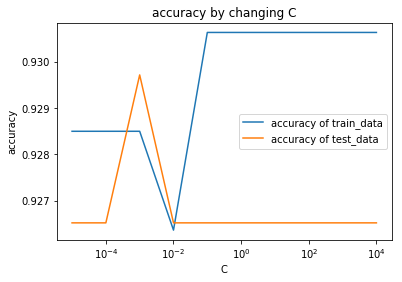

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_classification(
    n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# Cの値の範囲を設定(今回は1e-5,1e-4,1e-3,0.01,0.1,1,10,100,1000,10000)
C_list = [10 ** i for i in range(-5, 5)]

# グラフ描画用の空リストを用意
train_accuracy = []
test_accuracy = []

# 以下にコードを書いてください。
for value in C_list:
    model = LogisticRegression(C = value)
    model.fit(train_X, train_y)

    train_accuracy.append(model.score(train_X, train_y))
    test_accuracy.append(model.score(test_X, test_y))


# グラフの準備
# semilogx()はxのスケールを10のx乗のスケールに変更する
plt.semilogx(C_list, train_accuracy, label="accuracy of train_data")
plt.semilogx(C_list, test_accuracy, label="accuracy of test_data")
plt.title("accuracy by changing C")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
(plt.show()

In [ ]:
(例) penalty

先ほどのCが分類の誤りの許容度だったのに対し、penaltyはモデルの複雑さに対するペナルティを表します。

penaltyに入力できる値は二つ、「L1」と「L2」です。 基本的には「L2」を選べば大丈夫ですが、「L1」を選ぶ方が欲しいデータが得られる場合もあります。

L1 : データの特徴量を削減することで識別境界線の一般化を図るペナルティです。
L2 : データ全体の重みを減少させることで識別境界線の一般化を図るペナルティです。


In [ ]:
(例) multi_class

multi_classは多クラス分類を行う際にモデルがどういった動作を行うかということを決めるパラメーターです。 
ロジスティック回帰では「ovr」、「multinomial」の2つの値が用意されています。

ovr
クラスに対して「属する/属さない」の二値で応えるような問題に適しています。

multinomial
各クラスに分類される確率も考慮され、「属する/属さない」だけではなく「どれくらい属する可能性があるか」を扱う問題に適しています。

In [ ]:
random_state

モデルは学習の際にデータをランダムな順番で処理していくのですが、random_stateはその順番を制御するためのパラメーターです。 ロジスティック回帰モデルの場合、データによっては処理順によって大きく境界線が変わる場合があります。

また、このrandom_stateの値を固定することで同じデータでの学習結果を保存することができます。 当講座でも実行時に結果が変わらないようにrandom_stateの値は基本的に固定しています。

当講座で用いているデータはrandom_stateを変えても結果があまり変わりませんが、実際に用いる場合にはデータの再現性も考えてrandom_stateの値を固定するとよいでしょう。

In [ ]:
SVC

SVMにもロジスティック回帰と同様に分類の誤りの許容度を示すCがパラメーターとして定義されています。 使い方もロジスティック回帰と同様です。

SVMはロジスティック回帰に比べてCによるデータのラベルの予測値変動が激しいです。 SVMのアルゴリズムはロジスティック回帰にくらべてより一般化された境界線を得るため、誤りの許容度が上下するとサポートベクターが変化し、ロジスティック回帰よりも正解率が上下することになります。

線形SVMモデルではCの初期値は1.0です。

モジュールはLinearSVCを利用します。

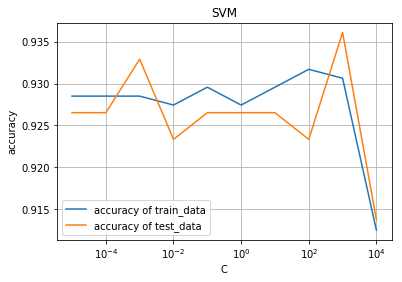

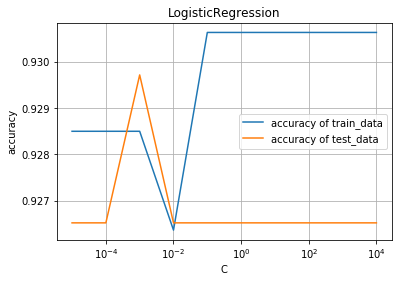

In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_classification(
    n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# Cの値の範囲を設定(今回は1e-5,1e-4,1e-3,0.01,0.1,1,10,100,1000,10000)
C_list = [10 ** i for i in range(-5, 5)]

# グラフ描画用の空リストを用意
svm_train_accuracy = []
svm_test_accuracy = []
log_train_accuracy = []
log_test_accuracy = []

for value in C_list:
    model1 = LinearSVC(C = value)
    model1.fit(train_X, train_y)
    model2 = LogisticRegression(C = value)
    model2.fit(train_X, train_y)
    
    svm_train_accuracy.append(model1.score(train_X, train_y))
    svm_test_accuracy.append(model1.score(test_X, test_y))
    log_train_accuracy.append(model2.score(train_X, train_y))
    log_test_accuracy.append(model2.score(test_X, test_y))
    
# グラフの準備
# semilogx()はxのスケールを10のx乗のスケールに変更する

fig = plt.figure()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.set_title("SVM")
ax.set_xlabel("C")
ax.set_ylabel("accuracy")
ax.semilogx(C_list, svm_train_accuracy, label="accuracy of train_data")
ax.semilogx(C_list, svm_test_accuracy, label="accuracy of test_data")
ax.legend()
ax.plot()
plt.show()
fig2 =plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
ax2.grid(True)
ax2.set_title("LogisticRegression")
ax2.set_xlabel("C")
ax2.set_ylabel("accuracy")
ax2.semilogx(C_list, log_train_accuracy, label="accuracy of train_data")
ax2.semilogx(C_list, log_test_accuracy, label="accuracy of test_data")
ax2.legend()
ax2.plot()
plt.show()

In [ ]:
penalty

ロジスティック回帰同様に線形SVMにもpenaltyのパラメーターがあります。 設定できる値も同じく、 "L1" と "L2" です。

L1ペナルティは主成分を抽出する働きがあります。
L2ペナルティは特定の相関性を見ず、データ全体の関係性を用いてモデルを説明しようとします。

In [ ]:
multi_class


multi_classは多項分類を行う際にモデルがどういった動作を行うかということを決めるパラメーターです。 
線形SVMでは「ovr」、「crammer_singer」の2つの値が用意されています。 基本的にはovrの方が動作が軽く結果が良いです。

線形SVMではmulti_classの初期値はovrです。
二値分類の場合このパラメーターを設定する必要はありません。

In [ ]:
非線形SVM(SVC)

線形分離可能でないデータを扱う場合SVMのSVCというモジュールを使います。 
SVCでもパラメーターCが存在します。
Cのことをソフトマージンのペナルティと呼びます。 \学習時に分類の誤りをどの程度許容するかを指定するパラメーターです。





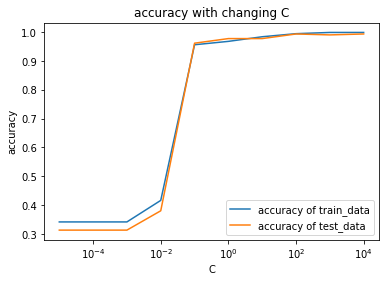

In [4]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_gaussian_quantiles(n_samples=1250, n_features=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# Cの値の範囲を設定(今回は1e-5,1e-4,1e-3,0.01,0.1,1,10,100,1000,10000)
C_list = [10 ** i for i in range(-5, 5)]

# グラフ描画用の空リストを用意
train_accuracy = []
test_accuracy = []

# 以下にコードを書いてください。
for value in C_list:
    model = SVC(C=value, random_state=42)
    model.fit(train_X, train_y)
     
    train_accuracy.append(model.score(train_X, train_y))
    test_accuracy.append(model.score(test_X, test_y)) 


# コードの編集はここまでです。

# グラフの準備
# semilogx()はxのスケールを10のx乗のスケールに変更する
plt.semilogx(C_list, train_accuracy, label="accuracy of train_data")
plt.semilogx(C_list, test_accuracy, label="accuracy of test_data")
plt.title("accuracy with changing C")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
kernel

パラメーターkernelは非線形SVMの中でも特に重要なパラメーターであり、
受け取ったデータを操作して分類しやすい形にするための関数を定義するパラメーターです。

linear、rbf、poly、sigmoid、precomputedの5つを値としてとることができます。
デフォルトはrbfです。

linearは線形SVMであり、LinearSVCとほぼ同じです。特殊な理由がない限りはLinearSVCを使いましょう。
LinearSVCとSVC(kernel="linear")では特別に定義されているLinearSVCの方が優れています。

rbf、polyは立体投影のようなものです。
rbfは他のものに比べ比較的高い正解率が出ることが多いので通常はデフォルトであるrbfを使用します。

precomputedはデータが前処理によってすでに整形済みの場合に用います。

sigmoidはロジスティック回帰モデルと同じ処理を行います。






In [ ]:
decision_function_shape はSVCにおけるmulti_classパラメーターのようなものです。
ovo、ovrの2つの値が用意されています。

ovoはクラス同士のペアを作り、そのペアでの2項分類を行い多数決で属するクラスを決定するという考え方です。
ovoはone vs oneの略で各クラス同士の総当たりの分類器を作成し予測します。
ovoの方は計算量が多くデータの量の増大によっては動作が重くなることが考えられます。

ovrは一つのクラスとそれ以外という分類を行い多数決で属するクラスを決定します。
ovrはone vs restの略で各クラスの自身とそれ以外を分類する分類器を作成し予測します。

In [6]:
# random_state に発生させた乱数を入れる

import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_classification(
    n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# 以下にコードを書いてください。
# 乱数生成器の構築
random_state = np.random.RandomState()

# モデルの構築
model = SVC(random_state=random_state)

# モデルの学習
model.fit(train_X, train_y)

# テストデータに対する正解率を出力
print(model.score(test_X, test_y))

0.948881789137


In [ ]:
決定木のハイパーパラメータ
max_depth = 木の最大の深さ。設定されていない場合、分類がほぼ終了するまでデータを分割する
　　　　　　　木の高さを制限することである程度汎化性能を高めることができる。＝枝刈り

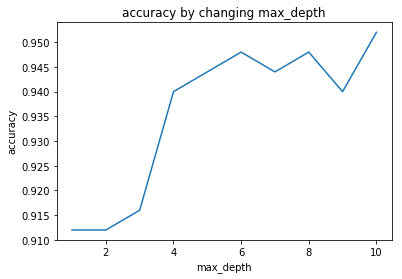

In [9]:
# モジュールのインポート
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_classification(
    n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# max_depthの値の範囲(1から10)
depth_list = [i for i in range(1, 11)]

# 正解率を格納するからリストを作成
accuracy = []

# max_depthを変えながらモデルを学習
for value in depth_list:
    model = DecisionTreeClassifier(max_depth = value, random_state=42)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

# グラフのプロット
plt.plot(depth_list, accuracy)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("accuracy by changing max_depth")
plt.show()

In [ ]:
random_state は学習結果の保持だけではなく、決定木の学習過程に直接関わるパラメーターです。

決定木の分割は分割を行う時点でよくデータの分類を説明できる要素の値を見つけ、データの分割を行うのですが、そのような値の候補はたくさん存在するため、 random_state による乱数の生成により、その候補を決めています。

In [ ]:
ランダムフォレストのパラメータ


ランダムフォレストの特徴として 複数の簡易決定木による多数決で結果が決定される というものが挙げられますが、その簡易決定木の個数を決めるのがこの n_estimators というパラメーターです。


ランダムフォレストは簡易決定木を複数作るので決定木に関するパラメーターを設定することが可能です。

max_depthは決定木に関するパラメーターですが、ランダムフォレストにおいては 通常の決定木より小さな値を入力します
簡易決定木の分類の多数決というアルゴリズムであるため一つ一つの決定木に対して厳密な分類を行うより着目要素を絞り俯瞰的に分析を行うことで学習の効率の良さと高い精度を保つことができます。
max_depthは決定木の過学習を防ぐためのパラメーターです。
ランダムフォレストは予測精度向上のため複数の決定木を作成しその決定木の多数決で決めるモデルです。

random_state はランダムフォレストにおいても重要なパラメーターです。

ランダムフォレストの名前の通り結果の固定のみならず、決定木のデータの分割や用いる要素の決定など多くの場面で乱数が寄与するこの手法ではこのパラメーターによって分析結果が大きく異なります。



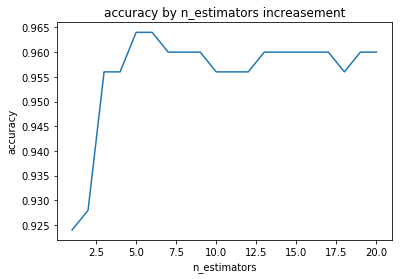

In [11]:
# モジュールのインポート
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_classification(
    n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# n_estimatorsの値の範囲(1から20)
n_estimators_list = [i for i in range(1, 21)]

# 正解率を格納するからリストを作成
accuracy = []

# 以下にコードを書いてください
# n_neighborsを変えながらモデルを学習
for value in n_estimators_list:
    model = RandomForestClassifier(n_estimators=value, random_state=42)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))


# コードの編集はここまでです。
# グラフのプロット
plt.plot(n_estimators_list, accuracy)
plt.title("accuracy by n_estimators increasement")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()

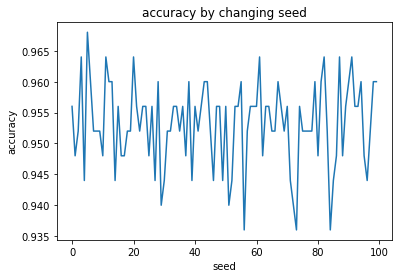

In [12]:
# モジュールのインポート
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_classification(
    n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# r_seedsの値の範囲(0から99)
r_seeds = [i for i in range(100)]

# 正解率を格納するからリストを作成
accuracy = []

# 以下にコードを書いてください
# random_stateを変えながらモデルを学習
#ここに答えを書いてください
for value in r_seeds:
    model = RandomForestClassifier(random_state=value)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))


# グラフのプロット
plt.plot(r_seeds, accuracy)
plt.xlabel("seed")
plt.ylabel("accuracy")
plt.title("accuracy by changing seed")
plt.show()

In [ ]:
k-NN(ｋ近傍法)のパラメータ

n_neighbors はk-NNのkの値のことです。 つまり、結果予測の際に使う類似データの個数を決めるパラメーターです。
n_neighbors の数が多すぎると類似データとして選ばれるデータの類似度に幅が出るため、分類範囲の狭いカテゴリーがうまく分類されないということが起こります。



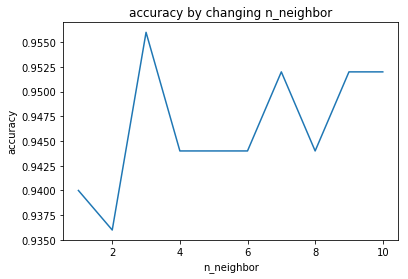

In [14]:
# モジュールのインポート
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# データの生成
X, y = make_classification(
    n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# n_neighborsの値の範囲(1から10)
k_list = [i for i in range(1, 11)]

# 正解率を格納するからリストを作成
accuracy = []

# n_neighborsを変えながらモデルを学習
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

# グラフのプロット
plt.plot(k_list, accuracy)
plt.xlabel("n_neighbor")
plt.ylabel("accuracy")
plt.title("accuracy by changing n_neighbor")
plt.show()

In [ ]:
グリッドサーチ

これまで主要な手法の中でよく使われるパラメーターを紹介してきました。 しかしこれら全てのパラメーターを都度変えて結果を確認するのは時間と手間がかかります。

そこで、パラメーターの範囲を指定して一番結果の良かったパラメーターセットを計算機に見つけてもらうという方法を使います。 主な方法は2つ、グリッドサーチとランダムサーチです。

グリッドサーチは調整したいハイパーパラメーターの値の候補を明示的に複数指定し、パラメーターセットを作成し、その時のモデルの評価を繰り返すことでモデルとして最適なパラメーターセットを作成するために用いられる方法です。

値の候補を明示的に指定するためパラメーターの値に文字列や整数、True or Falseといった数学的に連続ではない値をとるパラメーターの探索に向いています。 ただしパラメーターの候補を網羅するようにパラメーターセットが作成されるため多数のパラメーターを同時にチューニングするのには不向きです。

コードは以下のようになります。 プログラムの実行には時間がかかりますのでご注意ください。

値の候補を逐次的に全探索するため実行に時間がかかります。
パラメーターサーチの目的はモデルの予測精度が高くなるようなパラメーターを見つけることです。

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
train_X, test_X, train_y, test_y = train_test_split(
    data.data, data.target, random_state=42)

# パラメーターの値の候補を設定
param = {
    "C": [10 ** -i for i in range(5)],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "random_state": [42]
}

# 学習器を構築(ここではパラメーターを調整しない)
svm = SVC()
print("before search")

# グリッドサーチ実行
clf = GridSearchCV(svm, param)
clf.fit(train_X, train_y)

# パラメーターサーチ結果の取得
best_param = clf.best_params_

# 比較のため調整なしのsvmに対しても学習させ正解率を比較
svm.fit(train_X, train_y)
print("調整なしsvm:{}\n調整ありsvm:{}\n最適パラメーター:{}".format(
    svm.score(test_X, test_y), clf.score(test_X, test_y), best_param))

In [ ]:
ランダムサーチ


グリッドサーチは値の候補を指定してその上でパラメーターを調整しました。

ランダムサーチはパラメーターが取りうる値の範囲を指定し、確率で決定されたパラメーターセットを用いてモデルの評価を行うことを繰り返すことによって最適なパラメーターセットを探す方法です。

値の範囲の指定はパラメーターの確率関数を指定するというものになります。

パラメーターの確率関数としてscipy.statsモジュールの確率関数がよく用いられます。

パラメーターサーチの目的はモデルの予測精度を向上させるようなハイパーパラメーターの値を決定することにあります。

In [ ]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
train_X, test_X, train_y, test_y = train_test_split(
    data.data, data.target, random_state=42)

# パラメーターの値の候補を設定
param = {
    # 0から100までの一様確率変数(どの数も全て同じ確率で現れる)を定義
    "C": stats.uniform(low=0.0, high=100.0),
    # 乱数で選ぶ必要がないものはリストで指定
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "random_state": [42]
}

# 学習器を構築(ここではパラメーターを調整しない)
svm = SVC()

# ランダムサーチ実行
clf = RandomizedSearchCV(svm, param)
clf.fit(train_X, train_y)

# パラメーターサーチ結果の取得
best_param = clf.best_params_

# 比較のため調整なしのsvmに対しても学習させ正解率を比較
svm.fit(train_X, train_y)
print("調整なしsvm:{}\n調整ありsvm:{}\n最適パラメーター:{}".format(
    svm.score(test_X, test_y), clf.score(test_X, test_y), best_param))